<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/DecisionTree_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Decision Tree 실습 04

타이타닉 데이터 사용

In [62]:
# 반복되는 드라이브 경로 변수화
drive_path = '/content/drive/MyDrive/'

##### 데이터 준비

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# /content/drive/MyDrive/ML/temp/titanic.xls
df = pd.read_excel(drive_path + 'ML/temp/titanic.xls')

##### 데이터 분석 (시각화, EDA - 탐색적 데이터분석)

- 데이터를 세부적으로 살펴보는 것 <br> 
  (결측치, 이상치, 데이터분포, 라벨의 분포, 범주형 데이터의 종류 등 확인)
- 데이터를 시각화
- 데이터를 어떻게 수정할 것인지 결정

In [64]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- boat : 탈출한 보트가 있다면 boat 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [65]:
# 이상치 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


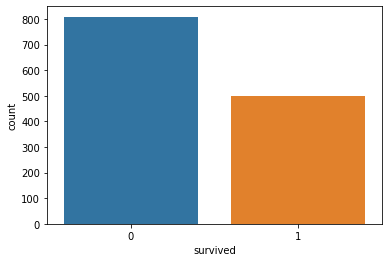

In [66]:
# 생존자 수 확인
import seaborn as sns

# countplot: 범주형 변수의 빈도수를 시각화
sns.countplot('survived', data=df)

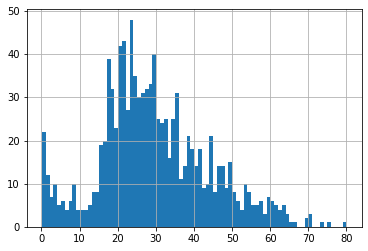

In [67]:
# 나이순으로 숫자 보기 
# histogram

df['age'].hist(bins=80)

In [68]:
# 선실 등급별 상황
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


**heatmap**

- Target Feature와 나머지 독립변수들의 상관계수를 직관적으로 확인
- 데이터.corr() : heatmap에 사용할 데이터의 상관계수

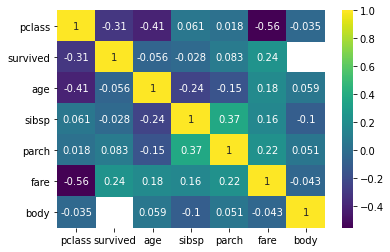

In [69]:
# 특성의 상관관계 분석
sns.heatmap(df.corr(), cmap=plt.cm.viridis, annot=True)

- 생존률과의 관계?


In [70]:
# 객실 등급(pclass)별, 연령대별, 성별 비교

# seaborn은 barplot() 함수를 사용할 때 
# 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어 있다.
# 오차막대를 그리는 범위는 기본적으로 
# “이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것”을 의미한다.
x = df['age']
bins = [0, 10, 20, 50, 100]
labels = ['baby', 'teenage', 'adult', 'old']
df['age_cut'] = pd.cut(x=x, bins=bins, labels=labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


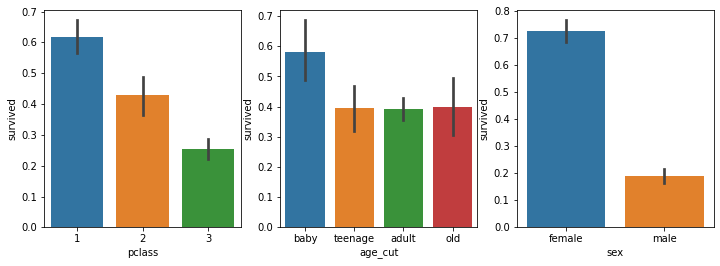

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4) )
sns.barplot('pclass', 'survived', data=df, ax=axes[0])
sns.barplot('age_cut', 'survived', data=df, ax=axes[1])
sns.barplot('sex', 'survived', data=df, ax=axes[2])

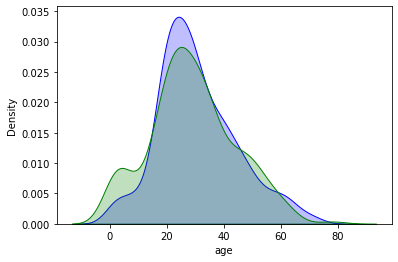

In [72]:
# 연령대별 생존여부 분포 비교 
# 커널밀도추정 KDE ; 데이터의 분포를 확인

# 사망자 분포
# df['age'][ df['survived'] == 0 ][ df['age'].notnull() ]
survived_0 = df['age'][ (df['survived'] == 0) & (df['age'].notnull()) ]
sns.kdeplot(survived_0, shade=True, color='b')
# 생존자 분포
survived_1 = df['age'][ (df['survived'] == 1) & (df['age'].notnull()) ]
sns.kdeplot(survived_1, shade=True, color='g')

- 성별 생존자수 비교 결과?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


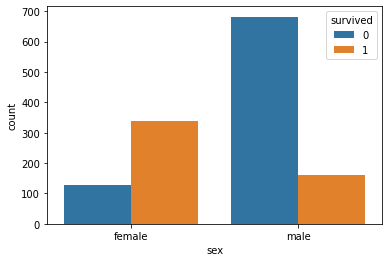

In [73]:
# 성별 생존자수 비교
# sns.countplot('sex', data=df)
sns.countplot('sex', hue='survived', data=df)

- 구조 보트에 탑승하고도 사망한 비율 ??%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    477
0      9
Name: survived, dtype: int64

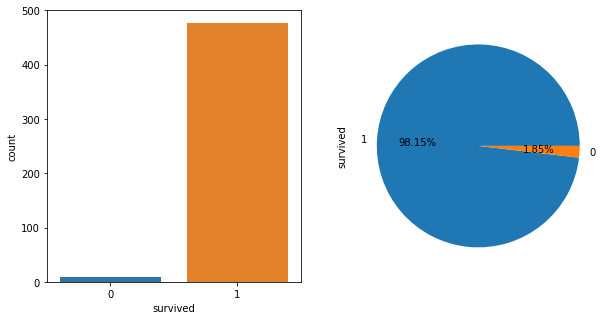

In [74]:
# 구조 보트에 탑승하고도 사망한 비율
boat_df = df[ df['boat'].notnull() ] 

fig, axes = plt.subplots(1, 2, figsize=(10, 5) )
sns.countplot('survived', data=boat_df, ax=axes[0])
boat_df['survived'].value_counts().plot.pie(autopct='%1.2f%%', ax=axes[1])
boat_df['survived'].value_counts()

##### 데이터 전처리

In [75]:
titanic_data = pd.read_excel(drive_path + 'ML/temp/titanic.xls')

In [76]:
df['embarked'].value_counts()
# 원핫인코딩 pd.get_dummies
pd.get_dummies(df['embarked']) 
pd.get_dummies(df['sex']) 

# dummies 사용안하고 하기
# df.loc[ df['sex'] == 'male' , 'sex' ]
# df.loc[ df['sex'] == 'female' , 'sex' ] = 1

# 결측치 확인
df.loc[pd.isnull(df['fare'] ),'fare' ]
# 평균값
fare_mean = df['fare'].mean()

# 결측치 채우기 fillna
# df['fare'].fillna(fare_mean)

In [77]:
# - embarked : 탑승장소별 컬럼 추가
# S=Southhampton, C=Cherbourg, Q=Queenstown
df['embarked_c'] = df['embarked'] == 'C'
df['embarked_s'] = df['embarked'] == 'S'
df['embarked_q'] = df['embarked'] == 'Q'

# 데이터에서 여성을 1로 남성을 0으로 설정
df.loc[ df['sex'] == 'male' , 'sex' ] = 0
df.loc[ df['sex'] == 'female' , 'sex' ] = 1

# fare : 지불한 운임
# 결측치 채움
fare_mean = df['fare'].mean()
df.loc[pd.isnull(df['fare'] ),'fare' ] = fare_mean

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      1309 non-null   int64   
 1   survived    1309 non-null   int64   
 2   name        1309 non-null   object  
 3   sex         1309 non-null   object  
 4   age         1046 non-null   float64 
 5   sibsp       1309 non-null   int64   
 6   parch       1309 non-null   int64   
 7   ticket      1309 non-null   object  
 8   fare        1309 non-null   float64 
 9   cabin       295 non-null    object  
 10  embarked    1307 non-null   object  
 11  boat        486 non-null    object  
 12  body        121 non-null    float64 
 13  home.dest   745 non-null    object  
 14  age_cut     1046 non-null   category
 15  embarked_c  1309 non-null   bool    
 16  embarked_s  1309 non-null   bool    
 17  embarked_q  1309 non-null   bool    
dtypes: bool(3), category(1), float64(3), int64(4), o

In [78]:
# Feature 선택
# X = 객실 클래스, 성별, 요금, 선착장 3개, 총 6요소
feature_names = [ 'pclass', 'sex', 'fare', 'embarked_c', 'embarked_q', 'embarked_s']
X = df[ feature_names ]
X.shape

(1309, 6)

In [79]:
# 정답셋 준비
# y = "survived"
y = df['survived']
y.shape

(1309,)

#### Decision Tree 실습 05

결정트리로 타이타닉 생존자 예측

In [80]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=13)

In [81]:
# 결정트리 적용
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8404074702886248, 0.8396946564885496)

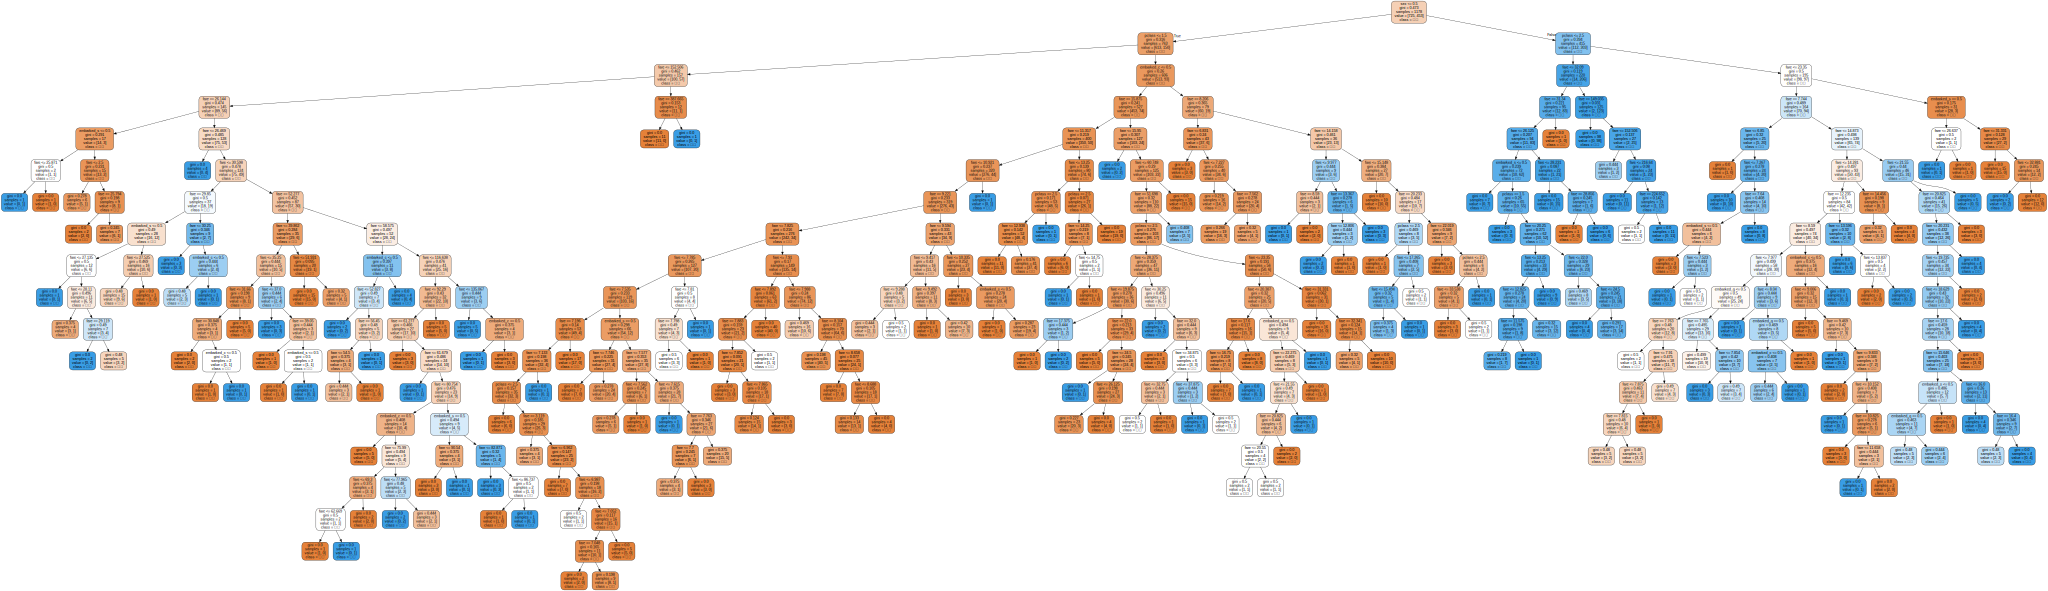

In [82]:
# 트리 구조 시각화하기
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file='tree.dot',
                class_names = ['사망','생존'],
                feature_names = X.columns,
                filled=True,
                rounded=True
                )
# with open('tree.dot') as f:
#   dot_graph=f.read()
# out_file=None > 파일저장 안함
display( graphviz.Source(dot_graph))

In [83]:
# 정확도 예측하기 (accuracy_score)
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred) * 100

83.96946564885496

In [85]:
# 실제 데이터를 넣어서 예측하기
# pclass, sex, age, sibsp, parch, fare
# dicaprio = [3., 0., 19., 0., 0., 5.]
# winslet  = [1., 1., 17., 1., 2., 100.]
dicaprio = [3., 0., 7., True, False, False]
winslet  = [1., 1., 30., False, False, True]

model.predict([ dicaprio ])
model.predict([ winslet ]), model.predict_proba([ winslet ])

(array([1]), array([[0., 1.]]))

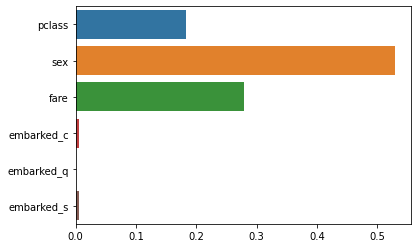

In [87]:
# Column 별 importances 확인
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=X.columns)